In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/content/Train.csv')

In [3]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
data = data.drop(['ID'], axis=1)

In [5]:
data.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

In [8]:
data.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


In [9]:
v = pd.get_dummies(data, sparse=True)

In [10]:
v

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,22,1.0,4.0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,67,1.0,1.0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,67,0.0,2.0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
5,56,0.0,2.0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
6,32,1.0,3.0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,41,0.0,5.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
8064,35,3.0,4.0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
8065,33,1.0,1.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
8066,27,1.0,4.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


In [11]:
numerical_data = v.to_numpy()

In [12]:
numerical_data.shape

(6665, 32)

In [50]:
X = numerical_data[:,:-4]
y = numerical_data[:,-4:]

In [14]:
X.shape

(6665, 28)

In [15]:
y.shape

(6665, 4)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from time import time

from keras import callbacks
from keras.models import Model
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling

In [19]:
input_vec = Input(shape=(28,))

encoded = Dense(28, activation='relu')(input_vec)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(3, activation='sigmoid')(encoded)

decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
decoded = Dense(28, activation='relu')(decoded)
decoded = Dense(28)(decoded)

autoencoder = Model(input_vec, decoded)

In [20]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28)]              0         
_________________________________________________________________
dense (Dense)                (None, 28)                812       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                464       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144   

In [21]:
encoder = Model(input_vec, encoded)

In [22]:
autoencoder.compile(optimizer='adam', loss='mse')

In [23]:
train_history = autoencoder.fit(X_train, X_train, epochs=500, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/500
21/21 [==============================] - 1s 13ms/step - loss: 77.9572 - val_loss: 79.1605
Epoch 2/500
21/21 [==============================] - 0s 4ms/step - loss: 76.7365 - val_loss: 77.6840
Epoch 3/500
21/21 [==============================] - 0s 4ms/step - loss: 74.9081 - val_loss: 75.3062
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 71.7952 - val_loss: 71.1919
Epoch 5/500
21/21 [==============================] - 0s 4ms/step - loss: 66.5880 - val_loss: 64.5606
Epoch 6/500
21/21 [==============================] - 0s 4ms/step - loss: 58.5942 - val_loss: 54.9210
Epoch 7/500
21/21 [==============================] - 0s 3ms/step - loss: 47.5820 - val_loss: 42.1743
Epoch 8/500
21/21 [==============================] - 0s 4ms/step - loss: 34.1479 - val_loss: 28.2526
Epoch 9/500
21/21 [==============================] - 0s 4ms/step - loss: 21.3416 - val_loss: 17.1079
Epoch 10/500
21/21 [==============================] - 0s 4ms/step - loss: 13.0996 - val_lo

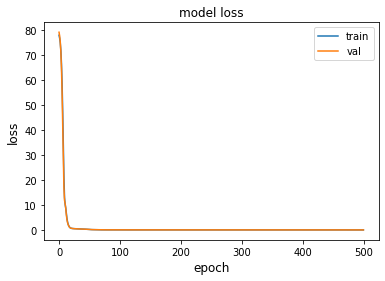

In [24]:
metric='loss'
plt.plot(train_history.history[metric])
plt.plot(train_history.history['val_' + metric])
plt.title('model ' + metric)
plt.ylabel(metric, fontsize='large')
plt.xlabel('epoch', fontsize='large')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

#Extremely Overlapping :)

In [25]:
pred_auto_train = encoder.predict(X_train)
pred_auto = encoder.predict(X_test)

In [89]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(pred_auto_train)

In [90]:
labels = kmeans.labels_

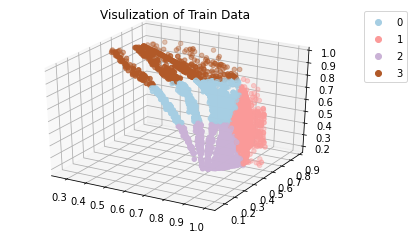

In [71]:
from mpl_toolkits import mplot3d
from matplotlib.colors import ListedColormap

fig = plt.figure()
ax = plt.axes(projection ='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = pred_auto_train[:,0]
y = pred_auto_train[:,2]
z = pred_auto_train[:,1]
sc = ax.scatter(x, y, z, c = labels, cmap='Paired')
ax.set_title('Visulization of Train Data')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [72]:
test_labels = kmeans.predict(pred_auto)

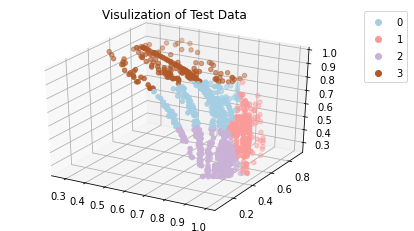

In [73]:
fig = plt.figure()
ax = plt.axes(projection ='3d')

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

x = pred_auto[:,0]
y = pred_auto[:,2]
z = pred_auto[:,1]
sc = ax.scatter(x, y, z, c = test_labels, cmap='Paired')
ax.set_title('Visulization of Test Data')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

In [85]:
labels

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

(array([1745.,    0.,    0., 1148.,    0.,    0., 1681.,    0.,    0.,
         758.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

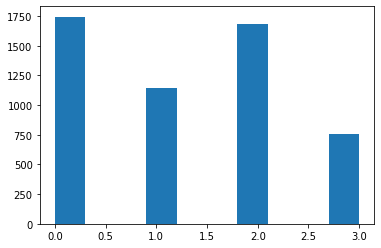

In [91]:
plt.hist(labels)

In [53]:
from itertools import permutations
l = list(permutations(range(0, 4)))
print(l)

[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]


In [94]:
from sklearn.metrics import accuracy_score
max_accuracy = 0
new_labels = labels.copy()

for per in l:
  for i in range(labels.shape[0]):
    if int(labels[i]) == 0:
      new_labels[i] = per[0]
    if int(labels[i]) == 1:
      new_labels[i] = per[1]
    if int(labels[i]) == 2:
      new_labels[i] = per[2]
    if int(labels[i]) == 3:
      new_labels[i] = per[3]
  
  print(accuracy_score(new_labels, y_train))
  max_accuracy = max(max_accuracy,accuracy_score(new_labels, y_train))
  new_labels = labels.copy()

print("Max Accuracy ", max_accuracy)

0.18810952738184547
0.3160165041260315
0.17929482370592648
0.30307576894223553
0.2308702175543886
0.22674418604651161
0.23612153038259565
0.3640285071267817
0.23255813953488372
0.33064516129032256
0.28413353338334585
0.25431357839459867
0.2528132033008252
0.3765941485371343
0.25806451612903225
0.3561515378844711
0.29669917479369845
0.2710052513128282
0.18454613653413354
0.18042010502625658
0.18979744936234058
0.1599774943735934
0.17685671417854465
0.1511627906976744
Max Accuracy  0.3765941485371343


In [77]:
for i in range(labels.shape[0]):
    if int(labels[i]) == 0:
      new_labels[i] = 3
    if int(labels[i]) == 1:
      new_labels[i] = 0
    if int(labels[i]) == 2:
      new_labels[i] = 2
    if int(labels[i]) == 3:
      new_labels[i] = 1
  
print(accuracy_score(new_labels, y_train))

0.18042010502625658


'\nlabel y\n0 3\n2 2\n1 0\n3 1\n'